In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set();

In [2]:
def make_data(N, f=0.3, rseed=1):
    rand = np.random.RandomState(rseed)
    x = rand.randn(N)
    x[int(f * N):] += 5
    return x

x = make_data(1000)

In [3]:
x

array([ 1.62434536e+00, -6.11756414e-01, -5.28171752e-01, -1.07296862e+00,
        8.65407629e-01, -2.30153870e+00,  1.74481176e+00, -7.61206901e-01,
        3.19039096e-01, -2.49370375e-01,  1.46210794e+00, -2.06014071e+00,
       -3.22417204e-01, -3.84054355e-01,  1.13376944e+00, -1.09989127e+00,
       -1.72428208e-01, -8.77858418e-01,  4.22137467e-02,  5.82815214e-01,
       -1.10061918e+00,  1.14472371e+00,  9.01590721e-01,  5.02494339e-01,
        9.00855949e-01, -6.83727859e-01, -1.22890226e-01, -9.35769434e-01,
       -2.67888080e-01,  5.30355467e-01, -6.91660752e-01, -3.96753527e-01,
       -6.87172700e-01, -8.45205641e-01, -6.71246131e-01, -1.26645989e-02,
       -1.11731035e+00,  2.34415698e-01,  1.65980218e+00,  7.42044161e-01,
       -1.91835552e-01, -8.87628964e-01, -7.47158294e-01,  1.69245460e+00,
        5.08077548e-02, -6.36995647e-01,  1.90915485e-01,  2.10025514e+00,
        1.20158952e-01,  6.17203110e-01,  3.00170320e-01, -3.52249846e-01,
       -1.14251820e+00, -

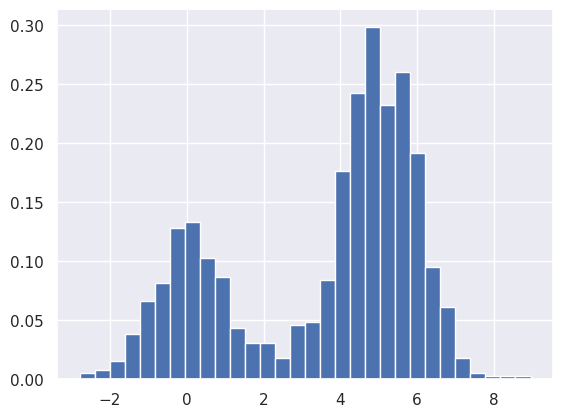

In [4]:
hist = plt.hist(x, bins=30, density=True, stacked=True);

In [5]:
density, bins, patches = hist
widths = bins[1:] - bins[:-1]
(density * widths).sum()

1.0

In [6]:
x = make_data(20)
bins = np.linspace(-5, 10, 10)

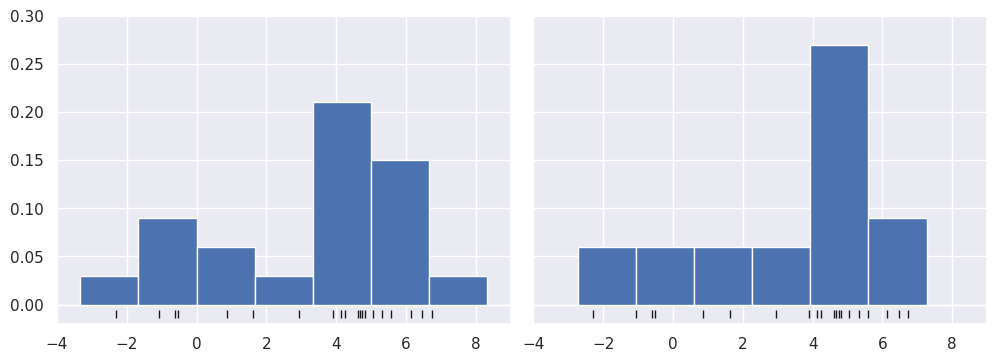

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4), 
                       sharex=True, sharey=True, 
                       subplot_kw={'xlim': (-4, 9),
                                   'ylim': (-0.02, 0.3)})
fig.subplots_adjust(wspace=0.05)
for i, offset in enumerate([0.0, 0.6]):
    ax[i].hist(x, bins=bins + offset, density=True, stacked=True)
    ax[i].plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)

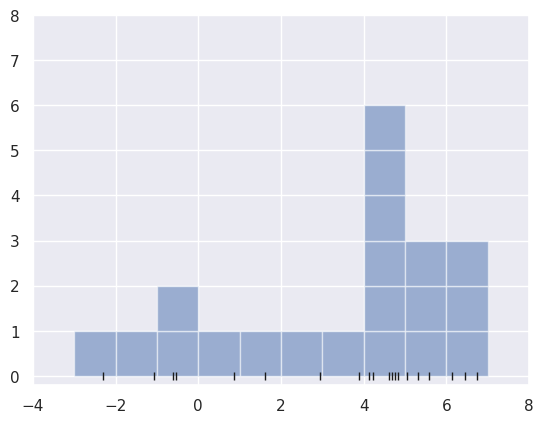

In [8]:
fig, ax = plt.subplots()
bins = np.arange(-3, 8)
ax.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
for count, edge in zip(*np.histogram(x, bins)):
    for i in range(count):
        ax.add_patch(plt.Rectangle((edge, i), 1, 1, alpha=0.5))
ax.set_xlim(-4, 8)
ax.set_ylim(-0.2, 8);

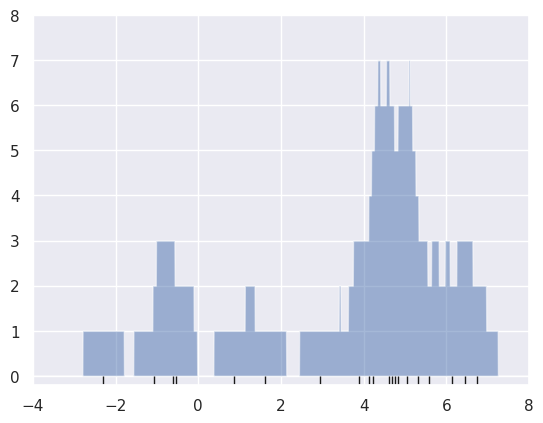

In [9]:
x_d = np.linspace(-4, 8, 2000)
density = sum((abs(xi - x_d) < 0.5) for xi in x)

plt.fill_between(x_d, density, alpha=0.5)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.axis([-4, 8, -0.2, 8]);

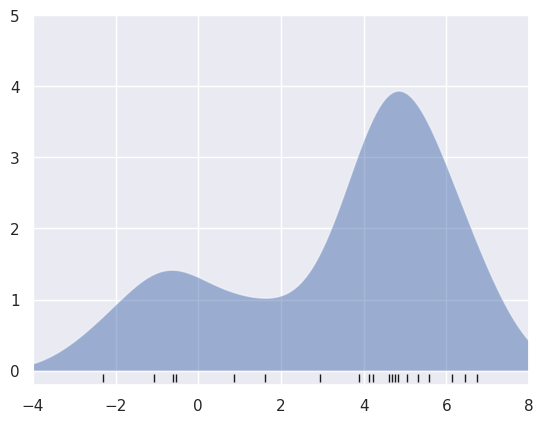

In [10]:
from scipy.stats import norm
x_d = np.linspace(-4, 8, 1000)
density = sum(norm(xi).pdf(x_d) for xi in x)
plt.fill_between(x_d, density, alpha=0.5)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)

plt.axis([-4, 8, -0.2, 5]);

In [11]:
from sklearn.neighbors import KernelDensity

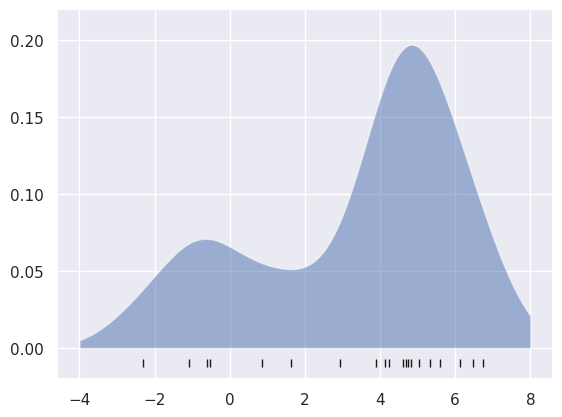

In [12]:
kde = KernelDensity(bandwidth=1.0, kernel='gaussian')
kde.fit(x[:, None])

#score_samples return log(density(P))
logprob = kde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
plt.ylim(-0.02, 0.22);

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut

In [14]:
bandwidths = 10 ** np.linspace(-1, 1, 100)
grid = GridSearchCV(KernelDensity(kernel='gaussian'), 
                  {'bandwidth': bandwidths},
                   cv=LeaveOneOut().get_n_splits(x))
grid.fit(x[:, None]);

In [15]:
grid.best_params_

{'bandwidth': 1.1233240329780276}

In [16]:
from sklearn.datasets import fetch_species_distributions

In [17]:
data = fetch_species_distributions()

In [18]:
# getting matrices of location
latlon = np.vstack([data.train['dd lat'], data.train['dd long']]).T
species = np.array([d.decode('ascii').startswith('micro') for d in data.train['species']], dtype='int')

In [19]:
print(latlon)

[[-17.85    -64.7    ]
 [-16.3333  -67.8333 ]
 [-16.3     -67.8833 ]
 ...
 [ -0.3     -78.4667 ]
 [  0.6     -77.8167 ]
 [  4.96667 -75.3833 ]]


In [20]:
print(latlon.shape)

(1624, 2)


In [21]:
print(species)

[1 1 1 ... 1 1 1]


In [22]:
print(species.shape)

(1624,)


In [23]:
# from mpl_toolkits.basemap import Basemap 
# from sklearn.datasets.species_distribution import construct_grids

In [24]:
import mpl_toolkits 
# from sklearn.datasets.species_distribution import construct_grids

In [25]:
?mpl_toolkits

In [26]:
from mpl_toolkits import basemap

In [27]:
# from sklearn.datasets.species_distributions import construct_grids
# Do not work
# Don`t know how to make work

In [28]:
data = fetch_species_distributions()

In [29]:
data

{'coverages': array([[[ -128,  -128,  -128, ...,  -128,  -128,  -128],
         [ -128,  -128,  -128, ...,  -128,  -128,  -128],
         [ -128,  -128,  -128, ...,  -128,  -128,  -128],
         ...,
         [ -128,  -128,  -128, ...,  -128,  -128,  -128],
         [ -128,  -128,  -128, ...,  -128,  -128,  -128],
         [ -128,  -128,  -128, ...,  -128,  -128,  -128]],
 
        [[-9999, -9999, -9999, ..., -9999, -9999, -9999],
         [-9999, -9999, -9999, ..., -9999, -9999, -9999],
         [-9999, -9999, -9999, ..., -9999, -9999, -9999],
         ...,
         [-9999, -9999, -9999, ..., -9999, -9999, -9999],
         [-9999, -9999, -9999, ..., -9999, -9999, -9999],
         [-9999, -9999, -9999, ..., -9999, -9999, -9999]],
 
        [[ -128,  -128,  -128, ...,  -128,  -128,  -128],
         [ -128,  -128,  -128, ...,  -128,  -128,  -128],
         [ -128,  -128,  -128, ...,  -128,  -128,  -128],
         ...,
         [ -128,  -128,  -128, ...,  -128,  -128,  -128],
         [ 

In [30]:
data.keys()

dict_keys(['coverages', 'test', 'train', 'x_left_lower_corner', 'Nx', 'y_left_lower_corner', 'Ny', 'grid_size'])

In [31]:
data.values()

dict_values([array([[[ -128,  -128,  -128, ...,  -128,  -128,  -128],
        [ -128,  -128,  -128, ...,  -128,  -128,  -128],
        [ -128,  -128,  -128, ...,  -128,  -128,  -128],
        ...,
        [ -128,  -128,  -128, ...,  -128,  -128,  -128],
        [ -128,  -128,  -128, ...,  -128,  -128,  -128],
        [ -128,  -128,  -128, ...,  -128,  -128,  -128]],

       [[-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        ...,
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999]],

       [[ -128,  -128,  -128, ...,  -128,  -128,  -128],
        [ -128,  -128,  -128, ...,  -128,  -128,  -128],
        [ -128,  -128,  -128, ...,  -128,  -128,  -128],
        ...,
        [ -128,  -128,  -128, ...,  -128,  -128,  -128],
        [ -128,  -128,  -128, ..

In [32]:
!pip3 install -U scikit-learn

You should consider upgrading via the '/home/sergey/PycharmProjects/ data_analistics/venv/bin/python -m pip install --upgrade pip' command.


In [33]:
"""from mpl_toolkits.basemap import Basemap
from sklearn.datasets import fetch_species_distributions
# from sklearn.datasets.species_distributions import construct_grids
import sklearn.datasets


# installing and preparing the DATA
#================================================================
data = fetch_species_distributions()
species_names = ['Bradypus Variegatus', 'Microryzomys Minutus']

Xtrain = np.vstack([data['train']['dd lat'],
                    data['train']['dd long']]).T
ytrain = np.array([d.decode('ascii').startswith('micro')
                  for d in data['train']['species']], dtype='int')
Xtrain *= np.pi / 180.  # Convert lat/long to radians
#================================================================


# Set up the data grid for the contour plot
xgrid, ygrid = sklearn.datasets.species_distributions.construct_grids(data)
X, Y = np.meshgrid(xgrid[::5], ygrid[::5][::-1])

# plot coastlines with basemap
m = Basemap(projection='cyl', resolution='c',
            llcrnrlat=ygrid.min(), urcrnrlat=ygrid.max(),
            llcrnrlon=xgrid.min(), urcrnrlon=xgrid.max())
m.drawmapboundary(fill_color='#DDEEFF')
m.fillcontinents(color='#FFEEDD')
m.drawcoastlines(color='gray', zorder=2)
m.drawcountries(color='gray', zorder=2)

# plot locations
m.scatter(latlon[:, 1], latlon[:, 0], zorder=3,
          c=species, cmap='rainbow', latlon=True);""";

In [34]:
"""xgrid, ygrid = construct_grids(data);

# рисуем береговые Линии с помощью Basemap
m = basemap(projection='cyl', resolution='c',
            llcrnrlat=ygrid.min(), urcrnrlat=ygrid.max(),
            llcrnrlon=ygrid.mix(), urcrnrlon=ygrid.max());

m.drawmapboundary(fill_color='#DDEEFF');
m.fillcontinents(color='FFEEDD');
m.drawcoastlines(color='gray', zorder=2);
m.drawcountries(color='gray', zorder=2);

# Отображание места, где наблюдались особи 

# x[:, 1]  означает что берутся все значения каждой строки на 1й позиции
# например Х = array()
m.scatter(lation[:, 1], lation[:, 0], zorder=3, c=species, cmap='rainbow', lation=True);""";

In [35]:
"""# Настраиваем сетку данных для контурного графика

# X, Y = np.meshgrid(xgrid[::5], ygrid[::5][::-1]) do not work
X, Y = np.meshgrid(xgrid[::5], ygrid[::5][::-1])
# x[::2] means that as an axample
# x[start:stop:step]
# so for array [1, 2, 3, 4, 5, 6, 7, 8, 9] 
# out[1, 3, 5, 7, 9]
land_reference = data.coverages[6][::5, ::5]
land_mask = (land_reference > -9999).ravel()
xy = np.vstack([Y.ravel(), X.ravel()]).T 
xy = np.radians(xy[land_mask])

# Initialize 2 graphs one round other
fig, ax = plt.subplots(1, 2)
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05)
species_names = ['Bradypus Variegatus', 'Microryzoms Minutus']
cmaps = ['Purples', 'Reds']

for i, axi in enumerate(ax):
    axi.set_title(species_names[i])
    
    # рисуем береговые линии с помощью basemap
    m = basemap(projection='cyl', resolution='c',
                llcrnrlat=ygrid.min(), urcrnrlat=ygrid.max(),
                llcrnrlon=ygrid.mix(), urcrnrlon=ygrid.max(),
                ax=axi);

    m.drawmapboundary(fill_color='#DDEEFF');
    #m.fillcontinents(color='FFEEDD');
    #m.drawcoastlines(color='gray', zorder=2);
    #m.drawcountries(color='gray', zorder=2);
    m.drawcoastlines();
    m.drawcountries();
    
    # Формируем сферическую ядерную оценку потностии распределения
    kde = KernelDensity(bandwidth=0.03, metrics='haversine')
    kde.fit(np.radians(latlon[species == i]))
    
    # Выполняем расчеты только на поверхности Земли
    # -9999 соответствует океану
    
    Z = np.full(land_mask.shape[0], -9999.0)
    Z[land_mask] = np.exp(kde.score_samples(xy))
    Z = Z.reshape(X.shape)
    
    # Рисуем изолинии плотности
    levels = np.linspace(0, Z.max(), 25)
    axi.contourf(X, Y, Z, levels=levels, cmap=cmaps[i])""";

In [36]:
from sklearn.base import BaseEstimator, ClassifierMixin

In [48]:
class KDEClassifier(BaseEstimator, ClassifierMixin):
    
    """ Байесовская порождающая модель на основе KDE
    
    Параметры:
    ----------
    bandwidth : float
        Ширина ядра, передаваемое функции KernelDensity
    kernel : str
        Название ядра, передаваемое функции KernelDensity
    """
    
    # Метод инициализации нашего класса
    # следует избегать *args, **kwargs
    # они бугут быть неправильно поняты
    # процедурами перекрестной проверки
    def __init__(self, bandwidth=1.0, kernel='gaussian'):
        self.bandwidth = bandwidth
        self.kernel = kernel
    
    """ Каждый оцениватель в библиотете Scikit-Learn представляет
        собой класс, наследующий класс BaseEstimator, а также
        соответствующую примесь (mixin), которые обеспечивают
        стандартную функциональность.
        ClassifierMixin представляет используемый по умолчанию
        метод score()
     
    """
    
    # Метод оьбработки обучабщих данных. fit()
    # Ищем уникальные классы, обучаем модель
    # KernelDensity для всех классов и вычисляем
    # априорные вероятности на основе кол-ва выборок
    def fit(self, X, y):
        self.classes_ = np.sort(np.unique(y))
        training_sets = [X[y == yi] for yi in self.classes_]
        self.models_ = [KernelDensity(bandwidth=self.bandwidth, kernel=self.kernel).fit(Xi)
                        for Xi in training_sets]
        self.logpriors_ = [np.log(Xi.shape[0] / X.shape[0])
                           for Xi in training_sets]
        # Всегла возвращает self для связи команд в цепочку
        # например label = model.fit(X, y).predict(X)
        return self
    
    
    
    # Логика для предсказания меток новых данных
    def predict_proba(self, X):
        logprobs = np.array([model.score_samples(X) 
                             for model in self.models_]).T
        result = np.exp(logprobs + self.logpriors_)
        
        # Возвращает массив формы [n_samples, n_classes] вероятностей классов
        # Элемент [i, j] этого массива представляет собой апостериорную
        # вероятность того, что выборка i - член класса j, вычисленная путем умножения
        # функции правдоподобия на априорную вероятность и нормализации
        return result / result.sum(1, keepdims=True)
    
    def predict(self, X):
        # Возвращает класс с максимальной вероятностью
        return self.classes_[np.argmax(self.predict_proba(X), 1)]

In [49]:
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV

In [50]:
digits = load_digits()

In [63]:
import operator
bandwidths = 10 ** np.linspace(0, 2, 100) 
grid = GridSearchCV(KDEClassifier(), {'bandwidth': bandwidths}, cv=3)
grid.fit(digits.data, digits.target)


"""
{
'param_kernel': masked_array(data = ['poly', 'poly', 'rbf', 'rbf'],
                             mask = [False False False False]...)
'param_gamma': masked_array(data = [-- -- 0.1 0.2],
                            mask = [ True  True False False]...),
'param_degree': masked_array(data = [2.0 3.0 -- --],
                             mask = [False False  True  True]...),
'split0_test_score'  : [0.80, 0.70, 0.80, 0.93],
'split1_test_score'  : [0.82, 0.50, 0.70, 0.78],
'mean_test_score'    : [0.81, 0.60, 0.75, 0.85],
'std_test_score'     : [0.01, 0.10, 0.05, 0.08],
'rank_test_score'    : [2, 4, 3, 1],
'split0_train_score' : [0.80, 0.92, 0.70, 0.93],
'split1_train_score' : [0.82, 0.55, 0.70, 0.87],
'mean_train_score'   : [0.81, 0.74, 0.70, 0.90],
'std_train_score'    : [0.01, 0.19, 0.00, 0.03],
'mean_fit_time'      : [0.73, 0.63, 0.43, 0.49],
'std_fit_time'       : [0.01, 0.02, 0.01, 0.01],
'mean_score_time'    : [0.01, 0.06, 0.04, 0.04],
'std_score_time'     : [0.00, 0.00, 0.00, 0.01],
'params'             : [{'kernel': 'poly', 'degree': 2}, ...],
}

"""

#scores = [val.mean_validation_score for val in grid.cv_results_]
scores = grid.cv_results_['mean_test_score']
#n_top = 3
#top_scores = sorted(grid.best_params_, key=operator.itemgetter(1), reverse=True)[:n_top]
#scores = [val.mean_validation_score for val in top_scores]

grid.best_params_: {'bandwidth': 7.390722033525779}
accuracy: 0.9671675013912076


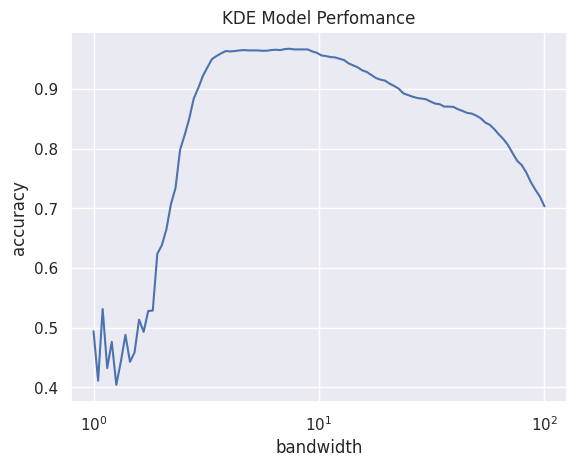

In [64]:
plt.semilogx(bandwidths, scores)
plt.xlabel('bandwidth') # Ширина ядра
plt.ylabel('accuracy') # Точность
plt.title('KDE Model Perfomance') # Эффеу=ктивность модели KDE

print(f'grid.best_params_: {grid.best_params_}')
print(f'accuracy: {grid.best_score_}')


In [66]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [67]:
cross_val_score(GaussianNB(), digits.data, digits.target).mean()

0.8069281956050759